In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
from pathlib import Path

In [21]:
path = Path(kagglehub.dataset_download("ahmedabbas757/coffee-sales"))/"Coffee Shop Sales.xlsx"
records = pd.read_excel(path, index_col="transaction_id")

In [22]:
transaction_datetime = pd.to_datetime(records["transaction_date"].astype(str) + " " + records["transaction_time"].astype(str))
transaction_datetime = pd.Series(transaction_datetime, name="transaction_datetime",index=None)

records = records.reindex([
    "transaction_datetime", 'transaction_qty', 'store_id', 
    'store_location', 'product_id', 'unit_price', 
    'product_category', 'product_type', 'product_detail'], axis="columns")

records["transaction_datetime"] = transaction_datetime
records.sort_values("transaction_datetime", inplace=True)

columns = ["store_location","product_category","product_type", "product_detail"]
records[columns] = records.loc[:,columns].astype("category")

records.head()

,transaction_datetime,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
transaction_id,,,,,,,,,
1,2023-01-01 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
2,2023-01-01 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
3,2023-01-01 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
4,2023-01-01 07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
5,2023-01-01 07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [23]:
records.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149116 entries, 1 to 149456
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   transaction_datetime  149116 non-null  datetime64[ns]
 1   transaction_qty       149116 non-null  int64         
 2   store_id              149116 non-null  int64         
 3   store_location        149116 non-null  category      
 4   product_id            149116 non-null  int64         
 5   unit_price            149116 non-null  float64       
 6   product_category      149116 non-null  category      
 7   product_type          149116 non-null  category      
 8   product_detail        149116 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(1), int64(3)
memory usage: 7.4 MB


In [54]:
def get_revenue(df: pd.DataFrame, tp="sum") -> float:
    return (df["transaction_qty"] * df["unit_price"]).__getattribute__(tp)()

(records[records["product_category"]=="Coffee"]
 .groupby(["store_location","product_type"],observed=True)
 .apply(get_revenue, tp="mean",include_groups=False)
 .unstack()
 .round(2)
)

product_type,Barista Espresso,Drip coffee,Gourmet brewed coffee,Organic brewed coffee,Premium brewed coffee
store_location,,,,,
Astoria,5.67,3.66,3.94,4.33,4.64
Hell's Kitchen,5.27,3.73,4.08,4.37,4.75
Lower Manhattan,5.84,3.97,4.45,4.66,4.93


<Axes: xlabel='transaction_datetime'>

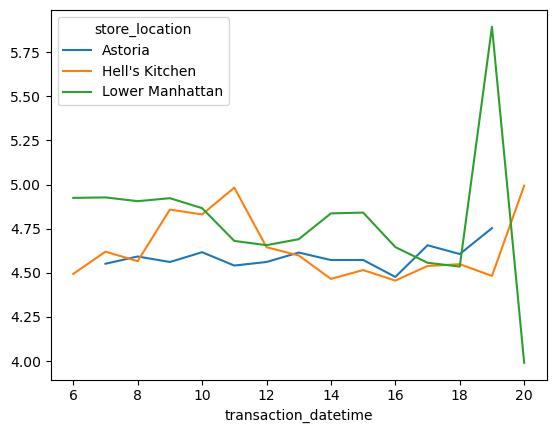

In [59]:
(records
 .groupby(["store_location",records["transaction_datetime"].dt.hour])
 .apply(get_revenue, tp="mean",include_groups=False)
 .unstack()
).T.plot()